In [5]:
import torch # torch
import torch.nn as nn # neural networks
import torch.nn.functional as F # layers, activations and more
from torch.utils.data import DataLoader # gives easier dataset management and creates mini batches
from torchvision import datasets, transforms # datasets and transforms
import numpy as np # numpy
import pandas as pd # pandas
from sklearn.metrics import confusion_matrix # for confusion matrix
import matplotlib.pyplot as plt # matplotlib

In [6]:
#MNIST Dataset
transform = transforms.ToTensor() # transform it into a torch tensor

In [7]:
#training data
train_data = datasets.MNIST(root='data', train=True, download=True, transform=transform) # download and transform the training data


100.0%


Extracting data\MNIST\raw\train-images-idx3-ubyte.gz to data\MNIST\raw



100.0%


Extracting data\MNIST\raw\train-labels-idx1-ubyte.gz to data\MNIST\raw



100.0%


Extracting data\MNIST\raw\t10k-images-idx3-ubyte.gz to data\MNIST\raw



100.0%

Extracting data\MNIST\raw\t10k-labels-idx1-ubyte.gz to data\MNIST\raw



In [8]:
#testing data
test_data = datasets.MNIST(root='data', train=False, download=True, transform=transform) # download and transform the testing data

In [9]:
#training data
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [10]:
#test data
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [12]:
image, label = train_data[0] # get the first image and its label
print('image.shape:', image.shape) # print the image shape
# answer: image.shape: torch.Size([1, 28, 28]) and it is a 1 channel image of 28x28 pixels

image.shape: torch.Size([1, 28, 28])


In [14]:
label # print the label
#answer: 5 (the label is a number)

5

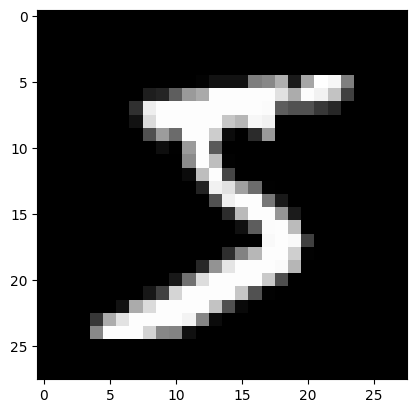

In [15]:
plt.imshow(image.reshape((28,28)), cmap='gray') # plot the image as grayscale
#reshape the image to 28x28 pixels, 
# because the image is 1x28x28 pixels and we need to remove the 1 channel dimension to plot it as a 28x28 image with plt.imshow function of matplotlib library.
plt.show() # show the image

In [16]:
torch.manual_seed(101) # set the random seed so things are reproducible 
#reproducible means that the same random numbers are generated every time the program is run.
train_loader = DataLoader(train_data, batch_size=100, shuffle=True) # create the train_loader with DataLoader
test_loader = DataLoader(test_data, batch_size=500, shuffle=False) # create the test_loader with DataLoader

In [17]:
from torchvision.utils import make_grid # for making a grid of images
np.set_printoptions(formatter=dict(int=lambda x: f'{x:4}')) # set the numpy print options to 4 spaces


In [18]:
# First we get a batch of images
for images,labels in train_loader:
    #60,000 images in the training set, 
    # and we are using a batch size of 100, 
    # so we will have 600 batches of 100 images each.
    break # break the loop after one iteration

In [19]:
images.shape # print the image shape
#answer: torch.Size([100, 1, 28, 28]), 
# because we are using a batch size of 100.

torch.Size([100, 1, 28, 28])

In [20]:
labels.shape # print the label shape
#answer: torch.Size([100]),
# because we are using a batch size of 100.

torch.Size([100])

labels: [   7    2    3    5    8    5    3    6    9    9    1    3]


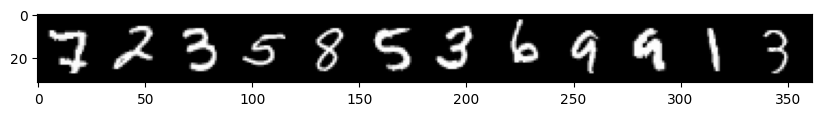

In [21]:
print('labels:', labels[:12].numpy()) # print the first 12 labels
img = make_grid(images[:12], nrow=12) # make a grid of the first 12 images
plt.figure(figsize=(10,4)) # set the figure size
plt.imshow(np.transpose(img, (1,2,0))) # plot the grid of images
#transpose the image to 28x28 pixels, 
# transpose function is used to convert the dimensions of an array.
plt.show() # show the images